## Pymaceuticals Inc.
### Analysis
#### OBSERVED TREND 1
Ramicane and Capomulin were more favorable to decrease the rate of growth
#### OBSERVED TREND 2
Propriva and Infubinol were less favorable to decrease the rate of growth
#### OBSERVED TREND 3
The rate of change of tumor size was quite consistent with the expection of Propriva and Infubinol

In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pprint import pprint

# create random colors
from random import randint


In [477]:
ct_file = "raw_data/clinicaltrial_data.csv"
m_file = "raw_data/mouse_drug_data.csv"

In [478]:
ct_df = pd.read_csv(ct_file)
#ct_df.head()

In [479]:
m_df = pd.read_csv(m_file)
#m_df.head()

In [480]:
df= pd.merge(ct_df,m_df, on="Mouse ID", how="outer")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Tumor Response to Treatment

In [481]:
#create a color list
drug_colors_dict = {}
for drug in drugs:
   drug_colors_dict[drug] ='#'+('%06X' % randint(0, 0xFFFFFF))

In [482]:

grouped = df.groupby(['Drug','Timepoint'])

drug_timepoint = pd.DataFrame({"Tumor Volume (mm3)":grouped['Tumor Volume (mm3)'].mean()})

drug_timepoint.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [483]:
# could create a series for each treatment
drug_mean_df = drug_timepoint.unstack().head()
capomulin_series = drug_mean_df.loc['Capomulin'].get_values()


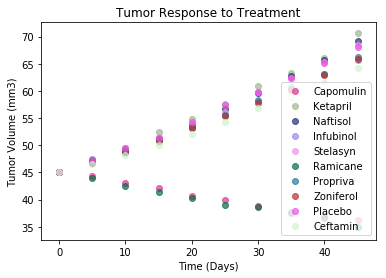

In [484]:
# or place within a loop
drugs = df['Drug'].unique()

obj = {}

for drug in drugs:
        obj[drug] = df.loc[df['Drug']== drug,:]
        x = obj[drug].groupby(['Drug','Timepoint'])['Timepoint'].first()
        y = obj[drug].groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
        plt.scatter(x,y,color=drug_colors_dict[drug],linestyle='-',linewidths='1',label=drug,alpha = 0.7)
    
plt.legend(drugs, loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

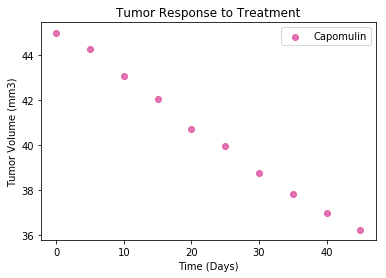

In [485]:
# just to show one treatment, Capomulin
drugs = df['Drug'].unique()

obj = {}

for drug in drugs:
    if drug == 'Capomulin':
        obj[drug] = df.loc[df['Drug']== drug,:]
        x = obj[drug].groupby(['Drug','Timepoint'])['Timepoint'].first()
        y = obj[drug].groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
        plt.scatter(x,y,color=drug_colors_dict[drug],linestyle='-',linewidths='1',label=drug,alpha = 0.7)
    
plt.legend(drugs, loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



### Metastatic Response to Treatment

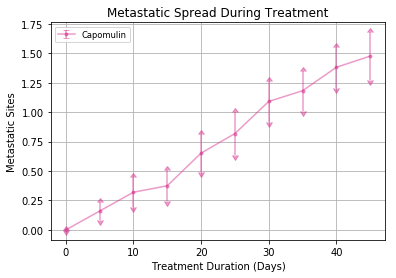

In [486]:
###2
## Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

obj = {}
fig, ax = plt.subplots()

for drug in drugs:
    if drug == 'Capomulin':
        obj[drug] = df.loc[df['Drug']== drug,:]
        x = obj[drug].groupby(['Drug','Timepoint'])['Timepoint'].first()
        y = obj[drug].groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
        q1 = np.percentile(y, 25)
        q3 = np.percentile(y,75)
        iqr = (q3 - q1)
        lower_boundary = q1 - (1.5 * iqr)
        upper_boundary = q3 + (1.5 * iqr)
        sem = obj[drug].groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
        ax.errorbar(x,y, yerr=sem,  fmt=".", linestyle='-',color=drug_colors_dict[drug],alpha=0.5, label=drug, uplims=upper_boundary, lolims=lower_boundary)

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")    
plt.legend(drugs, loc="best",fontsize="small", fancybox=True)
plt.grid()
plt.show()

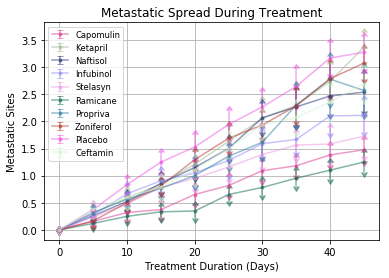

In [487]:
# A repeat of the above but showing all the treatments

obj = {}
fig, ax = plt.subplots()

for drug in drugs:
#     if drug == 'Capomulin':
        obj[drug] = df.loc[df['Drug']== drug,:]
        x = obj[drug].groupby(['Drug','Timepoint'])['Timepoint'].first()
        y = obj[drug].groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
        q1 = np.percentile(y, 25)
        q3 = np.percentile(y,75)
        iqr = (q3 - q1)
        lower_boundary = q1 - (1.5 * iqr)
        upper_boundary = q3 + (1.5 * iqr)
        sem = obj[drug].groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
        ax.errorbar(x,y, yerr=sem,  fmt=".", linestyle='-',color=drug_colors_dict[drug],alpha=0.5, label=drug, uplims=upper_boundary, lolims=lower_boundary)

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")    
plt.legend(drugs, loc="best",fontsize="small", fancybox=True)
plt.grid()
plt.show()

### Survival Rates

In [488]:
###3
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

grouped = df.groupby(['Drug','Timepoint'])

survival_df = pd.DataFrame({"Tumor Volume (mm3)":grouped['Tumor Volume (mm3)'].count()})
survival_df_table = survival_df.unstack()
survival_df_table

Tumor Volume (mm3)                                    
Timepoint                 0   5   10  15  20  25  30  35  40  45
Drug                                                            
Capomulin                 25  25  25  24  23  22  22  22  21  21
Ceftamin                  25  21  20  19  18  18  16  14  14  13
Infubinol                 25  25  21  21  20  18  17  12  10   9
Ketapril                  25  23  22  19  19  19  18  17  15  11
Naftisol                  25  23  21  21  20  18  15  15  15  13
Placebo                   25  24  24  20  19  17  15  14  12  11
Propriva                  26  25  23  17  17  14  13  10   9   7
Ramicane                  25  25  24  24  23  23  23  21  20  20
Stelasyn                  26  25  23  23  21  19  18  16  12  11
Zoniferol                 25  24  22  21  17  16  15  14  14  14

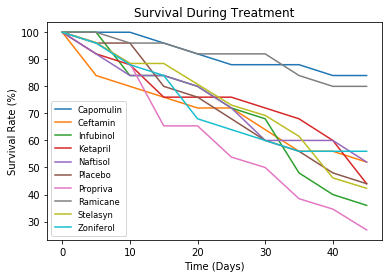

In [489]:
x= survival_df_table.columns
survival_rates = pd.DataFrame({
    'Capomulin':(survival_df_table.get_values()[0]/survival_df_table.get_values()[0][0])*100,
    'Ceftamin':(survival_df_table.get_values()[1]/survival_df_table.get_values()[1][0])*100,
    'Infubinol':(survival_df_table.get_values()[2]/survival_df_table.get_values()[2][0])*100,
    'Ketapril':(survival_df_table.get_values()[3]/survival_df_table.get_values()[3][0])*100,
    'Naftisol':(survival_df_table.get_values()[4]/survival_df_table.get_values()[4][0])*100,
    'Placebo':(survival_df_table.get_values()[5]/survival_df_table.get_values()[5][0])*100,
    'Propriva':(survival_df_table.get_values()[6]/survival_df_table.get_values()[6][0])*100,
    'Ramicane':(survival_df_table.get_values()[7]/survival_df_table.get_values()[7][0])*100,
    'Stelasyn':(survival_df_table.get_values()[8]/survival_df_table.get_values()[8][0])*100,
    'Zoniferol':(survival_df_table.get_values()[9]/survival_df_table.get_values()[9][0])*100
    })
plt.plot(x.levels[1],survival_rates)
plt.legend(tagg, loc="best",fontsize="small", fancybox=True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.show()


### Summary Bar Graph

In [490]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

tumor_volume_change_df = pd.DataFrame({
    "start":df.loc[df['Timepoint']==0,:]['Tumor Volume (mm3)'].groupby(df['Drug']).mean(),
    "End":df.loc[df['Timepoint']==45,:]['Tumor Volume (mm3)'].groupby(df['Drug']).mean(),
    "Change":df.loc[df['Timepoint']==45,:]['Tumor Volume (mm3)'].groupby(df['Drug']).mean()-df.loc[df['Timepoint']==0,:]['Tumor Volume (mm3)'].groupby(df['Drug']).mean()
        
})
tumor_volume_change_df   
    

,Change,End,start
Drug,,,
Capomulin,-8.763886,36.236114,45.0
Ceftamin,19.132421,64.132421,45.0
Infubinol,20.755562,65.755562,45.0
Ketapril,25.662958,70.662958,45.0
Naftisol,24.265506,69.265506,45.0
Placebo,23.084082,68.084082,45.0
Propriva,21.258529,66.258529,45.0
Ramicane,-10.044405,34.955595,45.0
Stelasyn,23.438310,68.438310,45.0


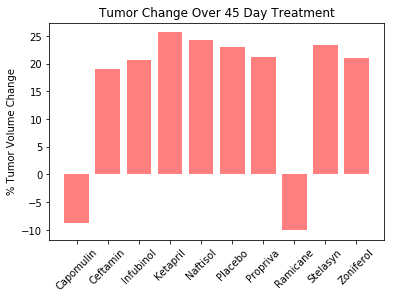

In [491]:
x = tumor_volume_change_df.index
y = tumor_volume_change_df['Change']

# def color_choice(y):
#     return 'g'if y<0 else 'r'

plt.bar(x,y, color= 'r', alpha=0.5, align="center") #color_choice(y)
plt.xticks(rotation = 45)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.show()
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")